ALL MODELS DESCIRBED HERE RUN THE ENTIRE DATA PREP AND FEATURE ENGINEERING NOTEBOOKS 
ALSO RUNNING ON HOUR FREQUENCY 
BATCH SIZE 128
EPOCHS 25

sub 39 : 
        model_A = Sequential()

        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l1_l2"))
        model_A.add(Dense(64, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(32, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(16, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 39: 
                64/64 [==============================] - 1s 8ms/step
                1095.9252690802348
                77/77 [==============================] - 1s 8ms/step
                108.4554586038961
                76/76 [==============================] - 3s 10ms/step
                91.25587557006634

sub 40: 
        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l2"))
        model_A.add(Dense(64, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(32, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(16, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 40: 
                64/64 [==============================] - 0s 7ms/step
                997.0125978473582
                77/77 [==============================] - 0s 5ms/step
                112.36317978896103
                76/76 [==============================] - 4s 12ms/step
                74.19562992330016

sub 41: 

        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l2"))
        model_A.add(Dense(64, activity_regularizer="l2"))
        model_A.add(Dense(32, activity_regularizer="l2"))
        model_A.add(Dense(16, activity_regularizer="l2"))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 41: 
                64/64 [==============================] - 3s 12ms/step
                1141.0985812133072
                77/77 [==============================] - 2s 6ms/step
                114.32893668831169
                76/76 [==============================] - 3s 11ms/step
                93.95477041873964
                










In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Notebook for running RNN model

RNN models (Recurent Neural Network) have LSTM neurons that hopefully can pick up on patterns evolving over time. 

In [46]:
import tensorflow
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


In [47]:
%store -r dm 
dm = dm


In [131]:

from sklearn.model_selection import train_test_split


X_A_train = dm.data_A.iloc[:, 1:]
y_A_train = dm.data_A.iloc[:,0]
X_B_train = dm.data_B.iloc[:, 1:]
y_B_train = dm.data_B.iloc[:,0]
X_C_train = dm.data_C.iloc[:, 1:]
y_C_train = dm.data_C.iloc[:,0]

X_train = dm.data.iloc[:, 1:]
y_train = dm.data.iloc[:,0]

X_train_A, X_validate_A, y_train_A, y_validate_A = train_test_split(X_A_train, y_A_train, shuffle=False, train_size=0.9)
#X_validate_A, X_test_A, y_validate_A, y_test_A = train_test_split(X_validate_A, y_validate_A, shuffle=False, test_size=0.3)

X_train_B, X_validate_B, y_train_B, y_validate_B = train_test_split(X_B_train, y_B_train, shuffle=False, train_size=0.9)
#X_validate_B, X_test_B, y_validate_B, y_test_B = train_test_split(X_validate_B, y_validate_B, shuffle=False, test_size=0.3)

X_train_C, X_validate_C, y_train_C, y_validate_C = train_test_split(X_C_train, y_C_train, shuffle=False, train_size=0.9)
#X_validate_C, X_test_C, y_validate_C, y_test_C = train_test_split(X_validate_C, y_validate_C, shuffle=False, test_size=0.3)

X, X_validate, y, y_validate = train_test_split(X_train, y_train, shuffle=False, train_size=0.8)

X_A_submission = dm.X_test_estimated_a[dm.X_test_estimated_a.columns.intersection(X_A_train.columns)]
X_B_submission = dm.X_test_estimated_b[dm.X_test_estimated_b.columns.intersection(X_B_train.columns)]
X_C_submission = dm.X_test_estimated_c[dm.X_test_estimated_c.columns.intersection(X_C_train.columns)]
X_submission = dm.X_test_estimated[dm.X_test_estimated.columns.intersection(X_train.columns)]

print(X_train_A.shape, y_train_A.shape, X_validate_A.shape, y_validate_A.shape)
print(X_train_B.shape, y_train_B.shape, X_validate_B.shape, y_validate_B.shape)
print(X_train_C.shape, y_train_C.shape, X_validate_C.shape, y_validate_C.shape)

print(X_train.shape, y_train.shape, X_submission.shape)

X_train

(30653, 48) (30653,) (3406, 48) (3406,)
(25097, 48) (25097,) (2789, 48) (2789,)
(20009, 48) (20009,) (2224, 48) (2224,)
(84178, 48) (84178,) (2160, 48)


,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,...,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,month,hours,week_number,day_year,sum_rad:W,location
0,0.420420,0.296000,0.000000,0.000000,0.5,0.686839,0.000000,0.000000,0.000000,0.000000,...,0.269811,0.198100,0.474474,0.0,1.00,0.066987,0.942728,0.936921,0.000000,0
1,0.420420,0.279111,0.000000,0.000000,0.5,0.686839,0.000000,0.000000,0.000000,0.000000,...,0.250943,0.210312,0.521021,0.0,1.00,0.017037,0.942728,0.936921,0.000000,0
2,0.430931,0.265778,0.000000,0.000000,0.5,0.695065,0.000000,0.000000,0.000000,0.000000,...,0.228302,0.232022,0.549550,0.0,1.00,0.000000,0.967508,0.941041,0.000000,0
3,0.463964,0.259556,0.000070,0.000898,0.5,0.719154,0.000903,0.000442,0.000000,0.000000,...,0.203774,0.251018,0.557057,0.0,1.00,0.017037,0.967508,0.941041,0.000653,0
4,0.495495,0.259556,0.010864,0.027661,0.5,0.738543,0.036039,0.018528,0.000219,0.000116,...,0.190566,0.264586,0.560060,0.0,1.00,0.066987,0.967508,0.941041,0.021901,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84173,0.229342,0.575269,0.121436,0.063125,0.5,0.463876,0.082599,0.153725,0.008097,0.039620,...,0.355556,0.640123,0.583206,0.5,0.75,0.500000,0.732362,0.737489,0.053619,2
84174,0.222597,0.586022,0.028091,0.004996,0.5,0.458474,0.008290,0.045709,0.000000,0.004075,...,0.325253,0.606432,0.595420,0.5,0.75,0.370590,0.732362,0.737489,0.004337,2
84175,0.222597,0.598925,0.000738,0.000000,0.5,0.456448,0.000000,0.004159,0.000000,0.000000,...,0.286869,0.566616,0.610687,0.5,0.75,0.250000,0.732362,0.737489,0.000000,2
84176,0.222597,0.601075,0.000000,0.000000,0.5,0.455098,0.000000,0.000000,0.000000,0.000000,...,0.286869,0.546708,0.627481,0.5,0.75,0.146447,0.732362,0.737489,0.000000,2


In [132]:
import LSTM_class

model_number_features = X.shape[1]
model_number_timesteps = 1

super_model = LSTM_class.RNN_Network() ## initialize LSTM Class 
super_model.create_model(model_number_features, model_number_timesteps) ## builds model for A B and C, builds same for each 



Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 1, 128)            90624     
                                                                 
 lstm_49 (LSTM)              (None, 1, 128)            131584    
                                                                 
 lstm_50 (LSTM)              (None, 1, 64)             49408     
                                                                 
 lstm_51 (LSTM)              (None, 1, 64)             33024     
                                                                 
 lstm_52 (LSTM)              (None, 1, 64)             33024     
                                                                 
 dense_44 (Dense)            (None, 1, 128)            8320      
                                                                 
 dropout_22 (Dropout)        (None, 1, 128)          

In [133]:
#super_model.fit_model(super_model.model_A, X_train_A, y_train_A)

super_model.fit_model(super_model.model_A, X, y, training_parameters={"epochs":100, "batch_size":128, "timesteps":model_number_timesteps}, kfolds=False)


Epoch 1/100
527/527 - 133s - loss: 0.0502 - 133s/epoch - 252ms/step
Epoch 2/100
527/527 - 108s - loss: 0.0409 - 108s/epoch - 204ms/step
Epoch 3/100
527/527 - 109s - loss: 0.0394 - 109s/epoch - 207ms/step
Epoch 4/100
527/527 - 109s - loss: 0.0389 - 109s/epoch - 208ms/step
Epoch 5/100
527/527 - 108s - loss: 0.0382 - 108s/epoch - 206ms/step
Epoch 6/100
527/527 - 109s - loss: 0.0371 - 109s/epoch - 207ms/step
Epoch 7/100
527/527 - 109s - loss: 0.0365 - 109s/epoch - 207ms/step
Epoch 8/100
527/527 - 110s - loss: 0.0363 - 110s/epoch - 208ms/step
Epoch 9/100
527/527 - 109s - loss: 0.0360 - 109s/epoch - 208ms/step
Epoch 10/100
527/527 - 109s - loss: 0.0357 - 109s/epoch - 206ms/step
Epoch 11/100
527/527 - 108s - loss: 0.0355 - 108s/epoch - 206ms/step
Epoch 12/100
527/527 - 104s - loss: 0.0357 - 104s/epoch - 198ms/step
Epoch 13/100
527/527 - 104s - loss: 0.0354 - 104s/epoch - 198ms/step
Epoch 14/100
527/527 - 104s - loss: 0.0351 - 104s/epoch - 198ms/step
Epoch 15/100
527/527 - 104s - loss: 0.0347 

KeyboardInterrupt: 

not emptu


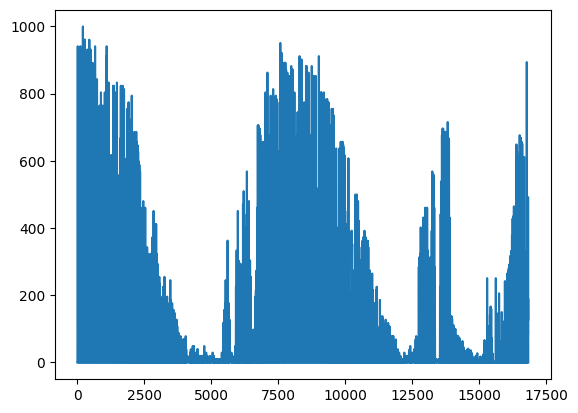

In [134]:
gt = y_validate
gt = dm.scaling(y_validate, "C")
gt = gt.reset_index().drop("index", axis=1)

plt.plot(gt)
plt.show()



In [135]:

preds = super_model.model_A.predict((np.asarray(X_validate).reshape(int(X_validate.shape[0]/model_number_timesteps), model_number_timesteps, X_validate.shape[1])).astype(float))
preds = dm.scaling(preds, "C")
gt = y_validate
gt = dm.scaling(gt, "C")


527/527 [==============================] - 14s 16ms/step
not emptu
not emptu


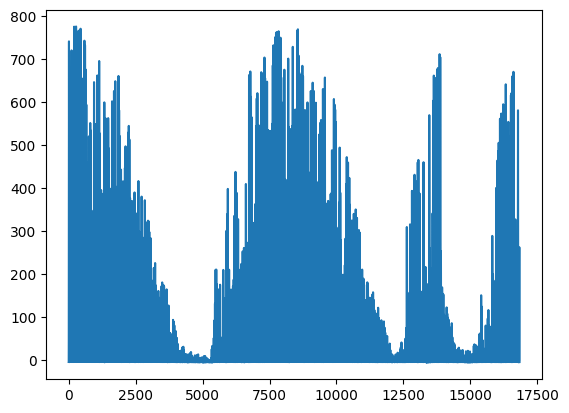

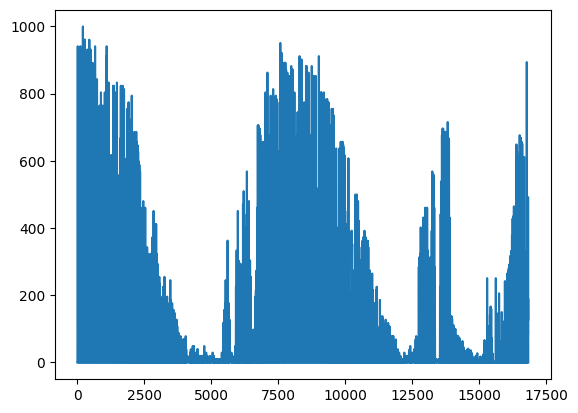

2441726.661914944


In [136]:
from keras.losses import mean_absolute_error

plt.plot(np.asarray(preds).reshape((preds.shape[0], )))

plt.show()

gt = pd.DataFrame(gt)
gt = gt.reset_index().drop("index", axis=1)

plt.plot(gt)
plt.show()

error = mean_absolute_error(gt, preds)
print(np.sum(error)/error.shape[0])


## Testing our model locally

In [137]:
## Specify the model to be used
pred_A = super_model.model_A.predict(np.asarray(X_A_submission).reshape((X_A_submission.shape[0], 1, X_A_submission.shape[1])).astype(float))
pred_B = super_model.model_A.predict(np.asarray(X_B_submission).reshape((X_B_submission.shape[0], 1, X_B_submission.shape[1])).astype(float))
pred_C = super_model.model_A.predict(np.asarray(X_C_submission).reshape((X_C_submission.shape[0], 1, X_C_submission.shape[1])).astype(float))

pred_A = pd.DataFrame(pred_A.reshape((720,)))
pred_B = pd.DataFrame(pred_B.reshape((720,)))
pred_C = pd.DataFrame(pred_C.reshape((720,)))

pred_A = dm.scaling(pred_A, "A")
pred_B = dm.scaling(pred_B, "B")
pred_C = dm.scaling(pred_C, "C")

test = pd.read_csv('test.csv')

df_mid = pd.concat([pred_A, pred_B], ignore_index=True)

df = pd.concat([df_mid, pred_C], join="inner", ignore_index=True)

# df[df<0] = 0

# NAME THE FILE 
df.to_csv("sub83.csv")


 1/23 [>.............................] - ETA: 1s

23/23 [==============================] - 0s 16ms/step
not emptu
not emptu
not emptu
